In [2]:
from ultralytics import YOLO
import gdown
import zipfile

In [ ]:
! gdown --id 1XuAgWm-gR3NCccvUlcOIYJFVjkWRSBrP

In [ ]:
zip_file = zipfile.ZipFile('Food-11.zip')
zip_file.extractall()
zip_file.close()

In [ ]:
# PROCESSING IMAGES
  # resizing: for uniform image sizes (set to 640x640)

import os
import cv2

dataset_path = "Food-11"

# Target image size
TARGET_SIZE = (640, 640)

# Function to resize (640) and augment images 
def resize(subset_path):
    for class_folder in os.listdir(subset_path):
        class_path = os.path.join(subset_path, class_folder)

        # Get list of images
        img_files = os.listdir(class_path)

        # Resize images
        for img_name in img_files:
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)

            resized_img = cv2.resize(img, TARGET_SIZE, interpolation=cv2.INTER_AREA)
            cv2.imwrite(img_path, resized_img)  # Overwrite original image


# Process train, val, and test sets
# Resize images in train, val, and test sets
for subset in ["train", "val", "test"]:
    subset_path = os.path.join(dataset_path, subset)
    print(f"Processing images in {subset_path} ...")
    resize(subset_path)

In [ ]:
# Renaming folders to match YOLO standards/preference(?)
dataset_path = "Food-11"
rename_dict = {
    "training": "train",
    "evaluation": "test",
    "validation": "val"
}
# Rename folders
for old_name, new_name in rename_dict.items():
    if os.path.exists(f"{dataset_path}/{new_name}"):
        continue
    old_path = os.path.join(dataset_path, old_name)
    new_path = os.path.join(dataset_path, new_name)
        
    os.rename(old_path, new_path)
    print(f"Renamed '{old_name}' -> '{new_name}'")

In [3]:
model = YOLO("yolo_food_11_best.pt")

In [8]:
# CHANGE THE FILE PATH BELOW
data_yaml = f"""
train: train
val: test

nc: 11
names: ['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food', 'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']
"""

with open("Food-11/data.yaml", "w") as file:
    file.write(data_yaml)

In [9]:
metrics = model.val(data='Food-11/data.yaml')
print(metrics)

Ultralytics 8.3.94  Python-3.13.1 torch-2.6.0+cpu CPU (AMD Ryzen 7 5700G with Radeon Graphics)


val: Scanning C:\Users\jpark\OneDrive\Documents\Codes\python\Transfer_Learning\Food-11\test... 3347 images, 0 corrupt: 100%|██████████| 3347/3347 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc:  10%|▉         | 20/210 [00:12<02:01,  1.56it/s]


KeyboardInterrupt: 

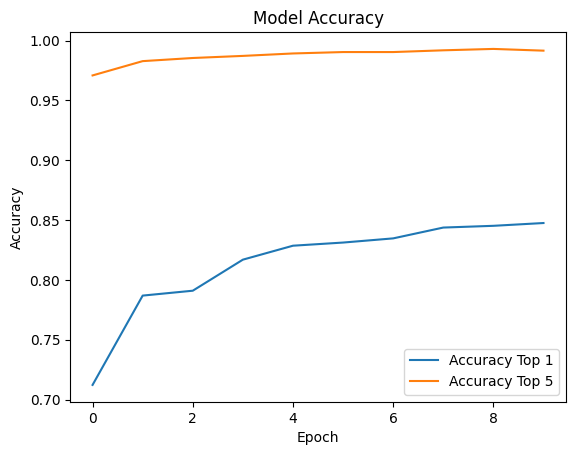

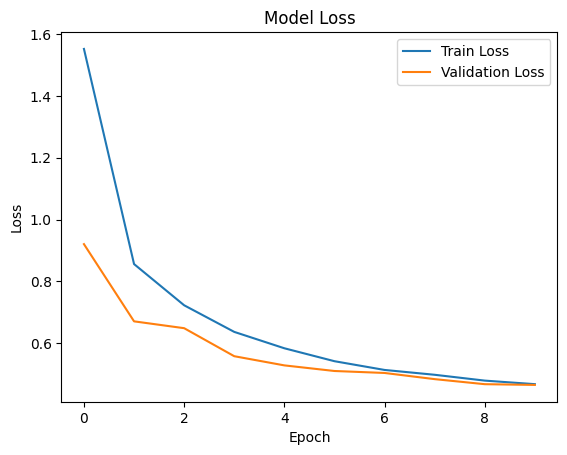

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load YOLO training results
results_path = "runs/classify/train/results.csv"
df = pd.read_csv(results_path)

# Extract necessary data
train_loss = df["train/loss"]
accuracy_top1 = df["metrics/accuracy_top1"]
accuracy_top5 = df["metrics/accuracy_top5"]
val_loss = df["val/loss"]

plt.plot(accuracy_top1)
plt.plot(accuracy_top5)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy Top 1', 'Accuracy Top 5'], loc='lower right')
plt.show()

plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()


0: 640x640 Fried food 0.37, Dairy product 0.27, Bread 0.17, Dessert 0.16, Soup 0.01, 29.0ms
1: 640x640 Dairy product 0.98, Bread 0.01, Dessert 0.01, Soup 0.00, Vegetable-Fruit 0.00, 29.0ms
2: 640x640 Seafood 0.82, Dessert 0.14, Soup 0.01, Meat 0.01, Egg 0.01, 29.0ms
3: 640x640 Bread 0.49, Dessert 0.14, Egg 0.13, Soup 0.12, Fried food 0.04, 29.0ms
4: 640x640 Fried food 0.62, Bread 0.15, Egg 0.15, Soup 0.04, Dessert 0.01, 29.0ms
5: 640x640 Dessert 0.78, Rice 0.08, Meat 0.08, Fried food 0.02, Bread 0.02, 29.0ms
6: 640x640 Noodles-Pasta 1.00, Egg 0.00, Meat 0.00, Soup 0.00, Dessert 0.00, 29.0ms
7: 640x640 Rice 1.00, Soup 0.00, Dairy product 0.00, Dessert 0.00, Bread 0.00, 29.0ms
8: 640x640 Seafood 1.00, Dessert 0.00, Soup 0.00, Meat 0.00, Egg 0.00, 29.0ms
9: 640x640 Soup 0.84, Noodles-Pasta 0.11, Dessert 0.02, Rice 0.02, Fried food 0.00, 29.0ms
10: 640x640 Vegetable-Fruit 1.00, Noodles-Pasta 0.00, Dessert 0.00, Dairy product 0.00, Rice 0.00, 29.0ms
Speed: 7.9ms preprocess, 29.0ms inferenc

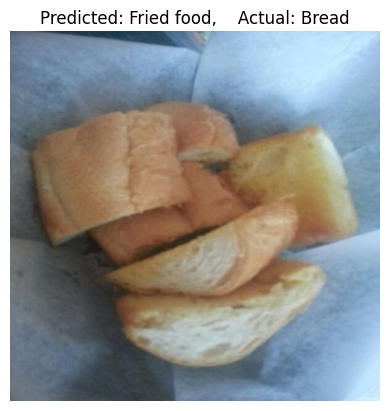

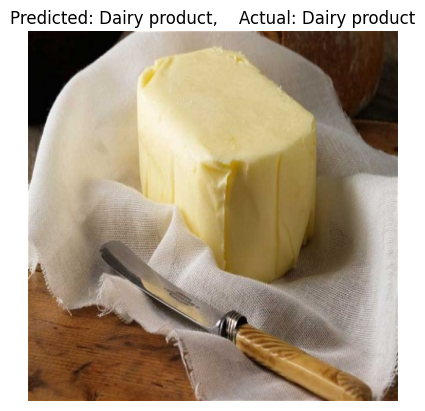

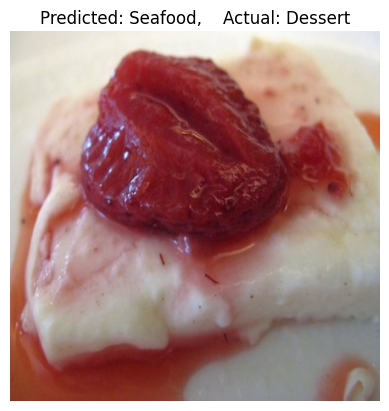

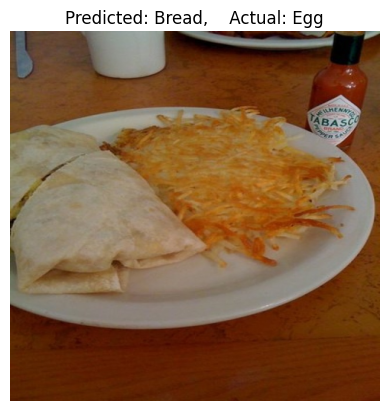

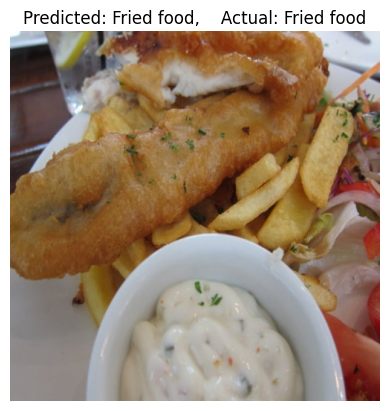

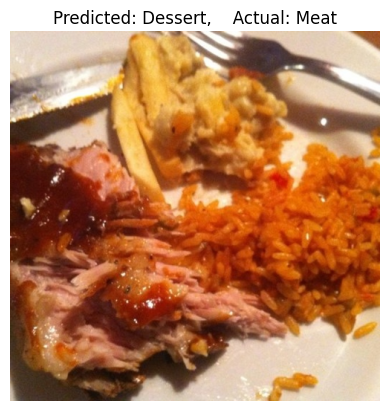

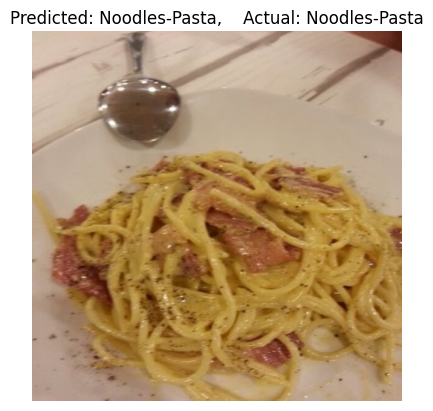

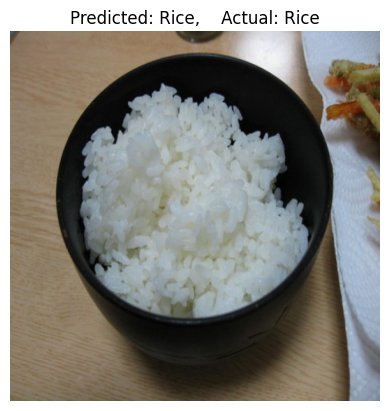

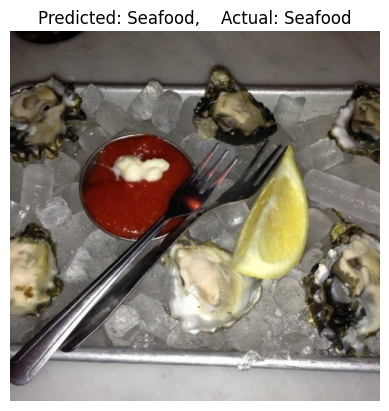

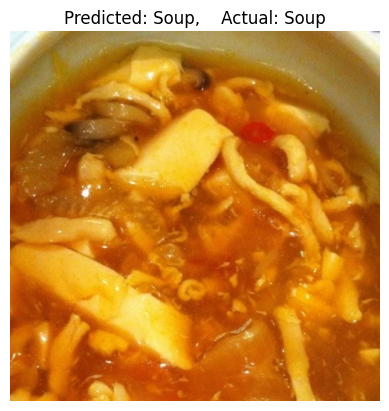

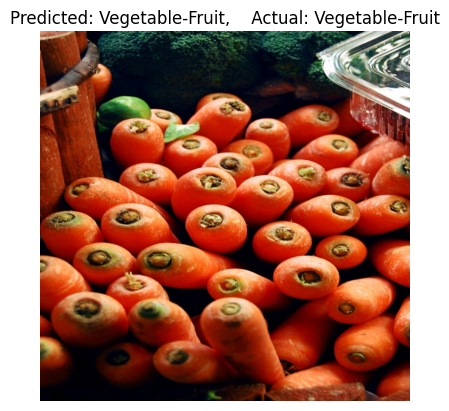

In [ ]:
import os
import matplotlib.pyplot as plt
import random

test_path = "Food-11/test/"
test_folder = os.listdir(test_path)
class_names = ['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food', 'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']
test_image_class = []

images = []
for food_class in test_folder:
  test_image_class.append(food_class)
  image_files = [f for f in os.listdir(test_path+"/"+food_class) if f.endswith('.jpg')]
  num_images = len(image_files)
  random_image_name = str(random.randint(1, num_images))
  image = test_path + "/" + food_class + "/" + random_image_name + ".jpg"
  images.append(image)

results = model(images)
for i in range(len(results)):
  plt.imshow(plt.imread(images[i]))
  plt.title(f"Predicted: {class_names[results[i].probs.top1]},    Actual: {test_image_class[i]}")
  plt.axis("off")
  plt.show()